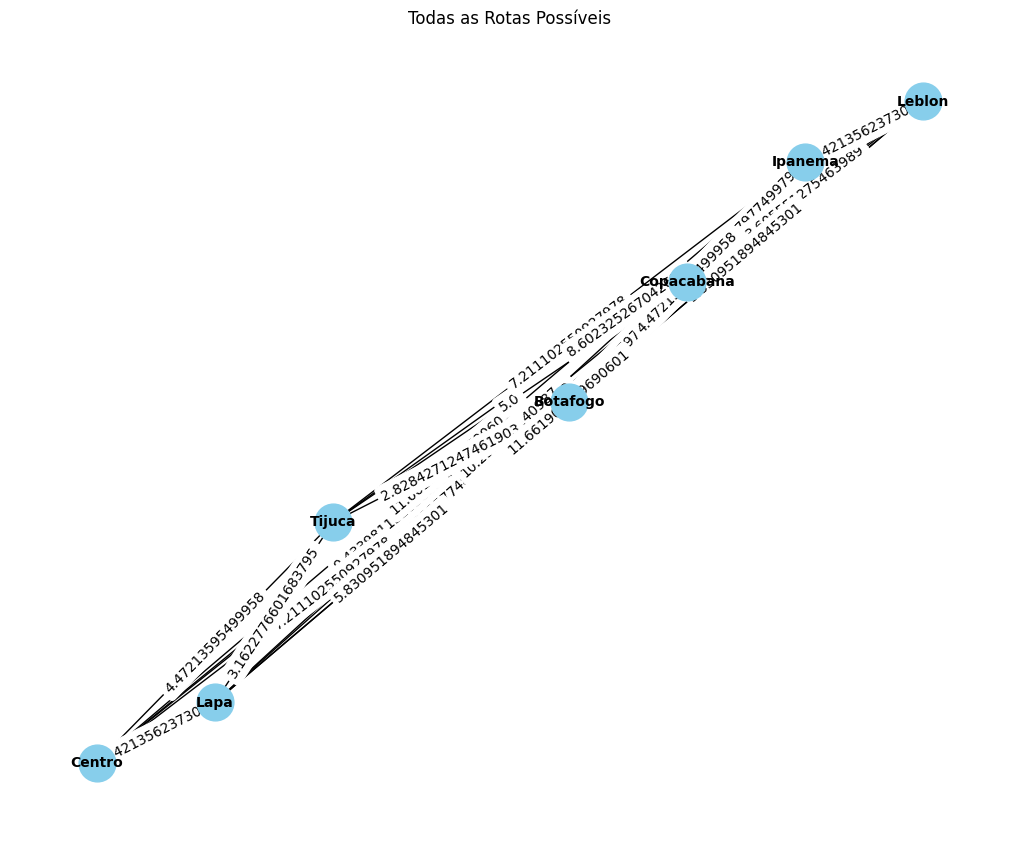

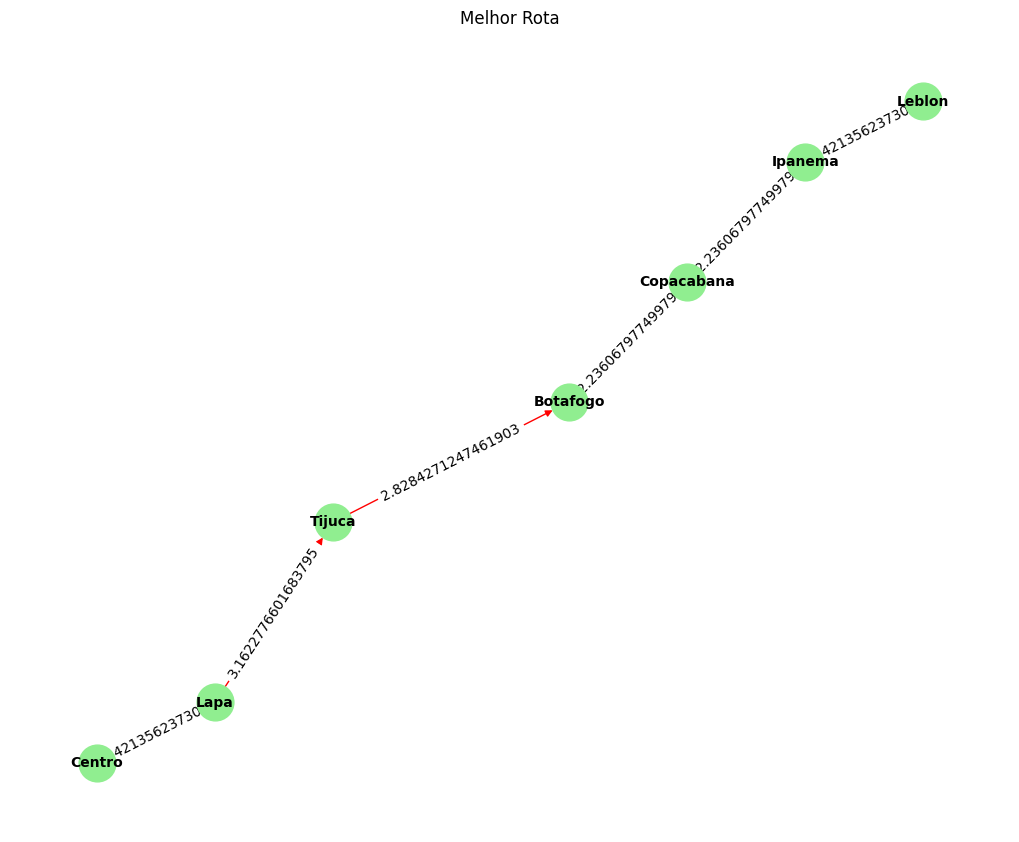

Melhor Rota: Centro -> Lapa -> Tijuca -> Botafogo -> Copacabana -> Ipanema -> Leblon com distância total de 13.29 unidades


In [1]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Coordenadas fictícias dos bairros do Rio de Janeiro
bairros = {
    'Centro': (0, 0),
    'Copacabana': (5, 8),
    'Ipanema': (6, 10),
    'Botafogo': (4, 6),
    'Leblon': (7, 11),
    'Tijuca': (2, 4),
    'Barra da Tijuca': (10, 0),
    'Flamengo': (3, 7),
    'Lapa': (1, 1)
}

# Função para calcular a distância euclidiana entre dois pontos
def distancia(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Entrada do usuário
bairro_inicial = 'Centro'
bairros_entrega = ['Copacabana', 'Ipanema', 'Botafogo', 'Leblon', 'Tijuca', 'Lapa']

# Todas as permutações possíveis das entregas
perm = itertools.permutations(bairros_entrega)
rota_inicial = [bairro_inicial] + bairros_entrega

# Encontrar a melhor rota usando o algoritmo TSP
melhor_rota = None
menor_distancia = float('inf')

for p in perm:
    rota = [bairro_inicial] + list(p)
    distancia_total = sum(distancia(bairros[rota[i]], bairros[rota[i+1]]) for i in range(len(rota)-1))
    if distancia_total < menor_distancia:
        menor_distancia = distancia_total
        melhor_rota = rota

# Visualização das rotas possíveis
G = nx.Graph()
for bairro in rota_inicial:
    G.add_node(bairro, pos=bairros[bairro])
    
for i in range(len(rota_inicial)):
    for j in range(i + 1, len(rota_inicial)):
        G.add_edge(rota_inicial[i], rota_inicial[j], weight=distancia(bairros[rota_inicial[i]], bairros[rota_inicial[j]]))

pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Todas as Rotas Possíveis")
plt.show()

# Visualização da melhor rota
G_best = nx.DiGraph()
for i in range(len(melhor_rota)-1):
    G_best.add_edge(melhor_rota[i], melhor_rota[i+1], weight=distancia(bairros[melhor_rota[i]], bairros[melhor_rota[i+1]]))

pos = nx.get_node_attributes(G, 'pos')
labels_best = nx.get_edge_attributes(G_best, 'weight')

plt.figure(figsize=(10, 8))
nx.draw(G_best, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='r', arrows=True)
nx.draw_networkx_edge_labels(G_best, pos, edge_labels=labels_best)
plt.title("Melhor Rota")
plt.show()
print(f"Melhor Rota: {' -> '.join(melhor_rota)} com distância total de {menor_distancia:.2f} unidades")
